# Image Color Clustering

## Image import

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import cv2

12,192,768 pixels (4032x3024)


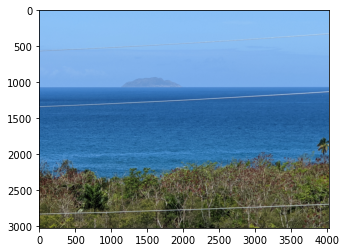

In [2]:
img = cv2.imread('IMG_20200501_103259.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img);
print(f'{img.shape[1]*img.shape[0]:,} pixels ({img.shape[1]}x{img.shape[0]})')

(3024, 4032, 3)
(201, 151)
30,351 pixels (201x151)


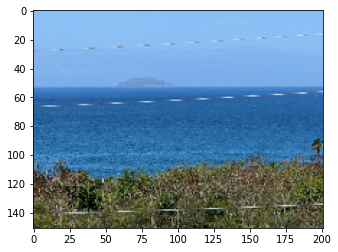

In [3]:
scale = 0.05
final_x = int(img.shape[1] * scale)
final_y = int(img.shape[0] * scale)
final_dim = (final_x, final_y)

print(img.shape)
print(final_dim)

img_reduced = cv2.resize(img, final_dim)
plt.imshow(img_reduced);
print(f'{img_reduced.shape[1]*img_reduced.shape[0]:,} pixels ({img_reduced.shape[1]}x{img_reduced.shape[0]})')

In [4]:
#get rgb values from image to 1D array
r, g, b = cv2.split(img_reduced)
r = r.flatten()
g = g.flatten()
b = b.flatten()

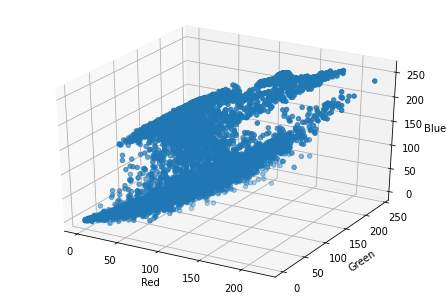

In [5]:
#plotting 
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(r, g, b, )
ax.set_xlabel('Red')
ax.set_ylabel('Green')
ax.set_zlabel('Blue')
plt.show()

# kmeans clustering

In [46]:
import cv2
from sklearn.cluster import KMeans
import numpy as np

class DominantColors:

    CLUSTERS = None
    IMAGE = None
    COLORS = None
    LABELS = None
    
    def __init__(self, image, clusters=3, size=0.01):
        self.CLUSTERS = clusters
        self.IMAGE = image
        self.SIZE = size
        
    def scaleImage(self, img, long_side=200):
        factor = long_side / max(img.shape)
        final_dim = (int(img.shape[1]*factor), int(img.shape[0]*factor))
        scaled_img = cv2.resize(img, final_dim)
        print(f'Scaled image: {scaled_img.shape[0] * scaled_img.shape[1]:,} pixels (scale factor {factor:2.2%})')
        plt.figure(figsize=(10,10))
        plt.imshow(scaled_img)
        return scaled_img
    
    def clusterColors(self):
    
        #read image
        img = cv2.imread(self.IMAGE)
        print(f'Original image: {img.shape[0] * img.shape[1]:,} pixels')
        
        #convert to rgb from bgr
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)                
        
        #resize image
        img = self.scaleImage(img, self.SIZE)

        #reshaping to a list of pixels
        img = img.reshape((img.shape[0] * img.shape[1], 3))
        
        #save image after operations
        self.IMAGE = img
        
        #using k-means to cluster pixels
        kmeans = KMeans(n_clusters = self.CLUSTERS)
        kmeans.fit(img)
        
        #the cluster centers are our dominant colors.
        self.COLORS = kmeans.cluster_centers_
        
        #save labels
        self.LABELS = kmeans.labels_
        
        #returning after converting to integer from float
        return self.COLORS.astype(int)
    
    def rgb_to_hex(self, rgb):
        return '#%02x%02x%02x' % (int(rgb[0]), int(rgb[1]), int(rgb[2]))
    
    def plotClusters(self):
        #plotting 
        fig = plt.figure(figsize=(9,9))
        ax = Axes3D(fig)        
        for label, pix in zip(self.LABELS, self.IMAGE):
            ax.scatter(
                pix[0], 
                pix[1], 
                pix[2], 
                color = self.rgb_to_hex(self.COLORS[label]))
        ax.set_xlabel('Red')
        ax.set_ylabel('Blue')
        ax.set_zlabel('Green')
        plt.show()
        
    def plotHistogram(self):
       
        #labels form 0 to no. of clusters
        numLabels = np.arange(0, self.CLUSTERS+1)
       
        #create frequency count tables    
        (hist, _) = np.histogram(self.LABELS, bins = numLabels)
        hist = hist.astype("float")
        hist /= hist.sum()
        
        #appending frequencies to cluster centers
        colors = self.COLORS
        
        #descending order sorting as per frequency count
        colors = colors[(-hist).argsort()]
        hist = hist[(-hist).argsort()] 
        
        #creating empty chart
        chart = np.zeros((50, 500, 3), np.uint8)
        start = 0
        
        #creating color rectangles
        for i in range(self.CLUSTERS):
            end = start + hist[i] * 500
            
            #getting rgb values
            r = colors[i][0]
            g = colors[i][1]
            b = colors[i][2]
            
            #using cv2.rectangle to plot colors
            cv2.rectangle(chart, (int(start), 0), (int(end), 50), (r,g,b), -1)
            start = end	
        
        #display chart
        plt.figure(figsize=(10,10))
        plt.axis("off")
        plt.imshow(chart)
        
        plt.show()

IMG_20200430_072041.jpg
Original image: 7,990,272 pixels
Scaled image: 187,500 pixels (scale factor 15.32%)


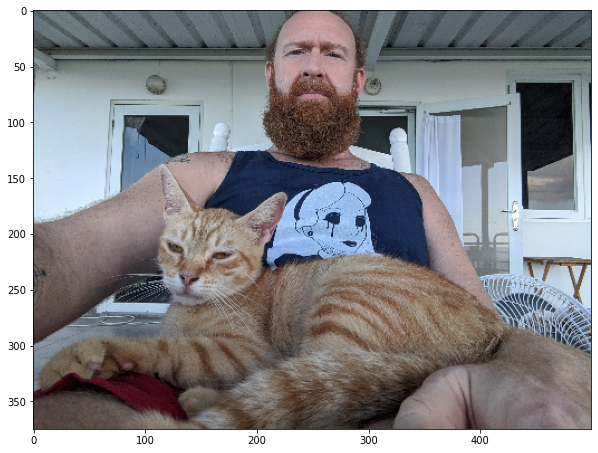

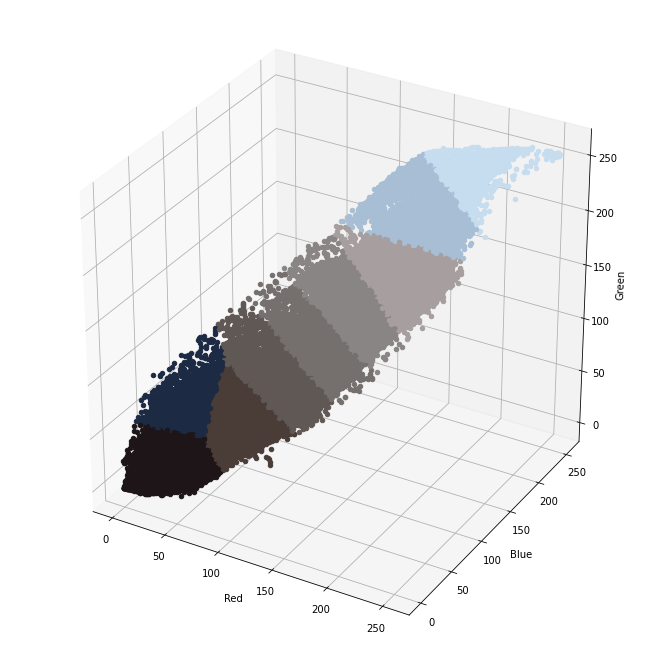

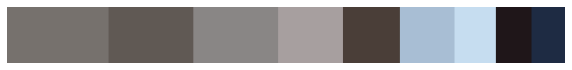

IMG_20200501_194623.jpg
Original image: 12,192,768 pixels
Scaled image: 187,500 pixels (scale factor 12.40%)


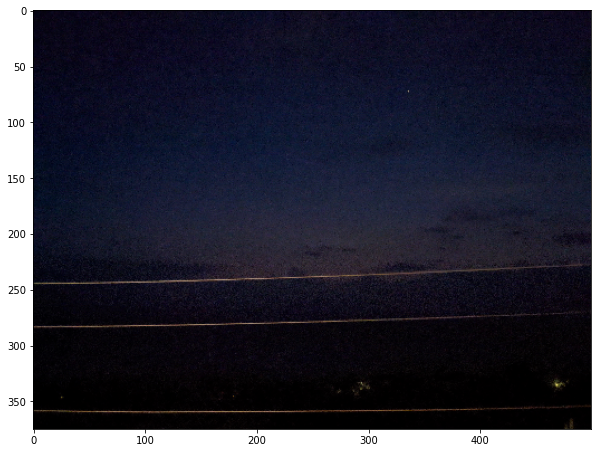

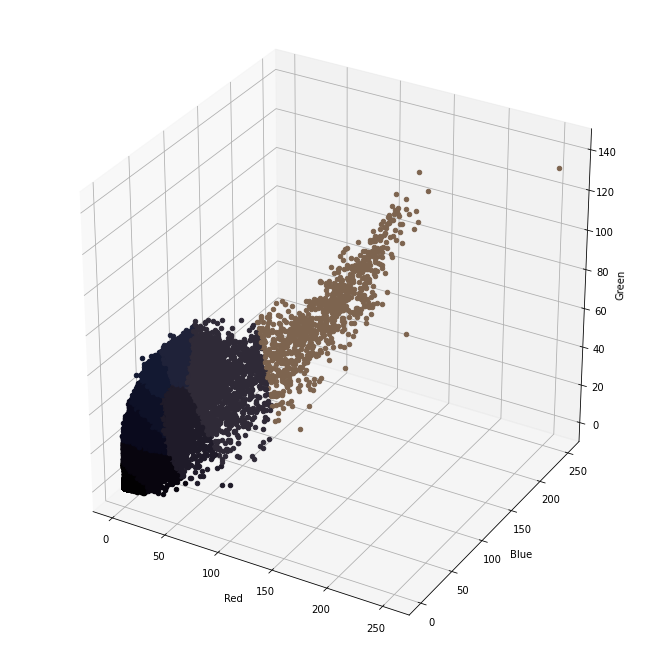

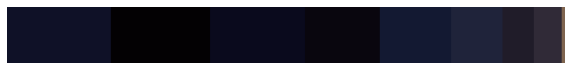

org_b531fdd25d8dbef1_1588277534000.jpg
Original image: 19,961,856 pixels
Scaled image: 166,500 pixels (scale factor 9.14%)


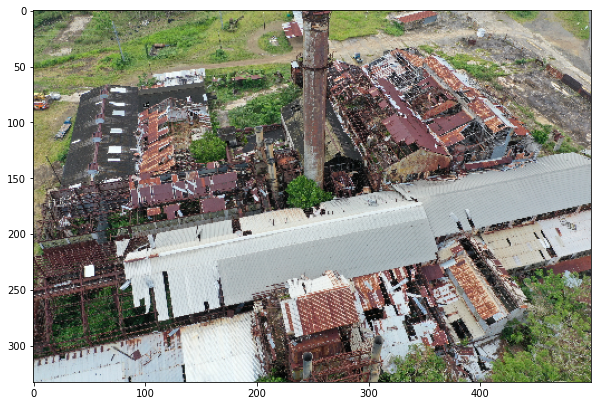

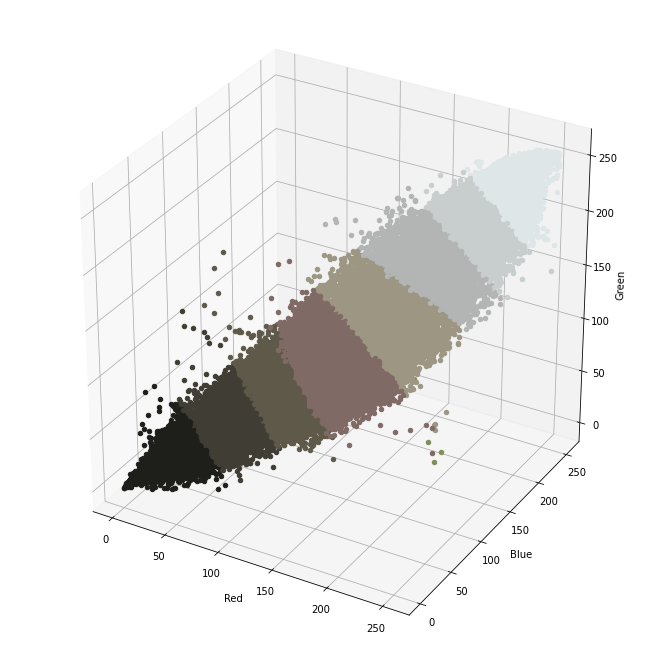

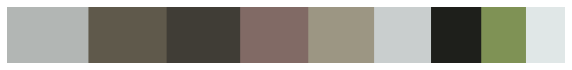

IMG_20200501_191420.jpg
Original image: 12,192,768 pixels
Scaled image: 187,500 pixels (scale factor 12.40%)


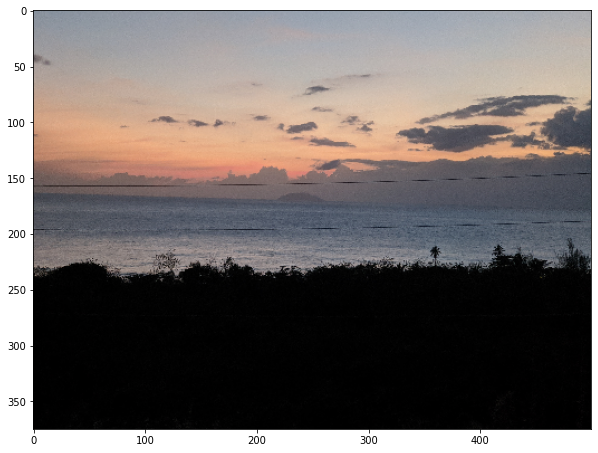

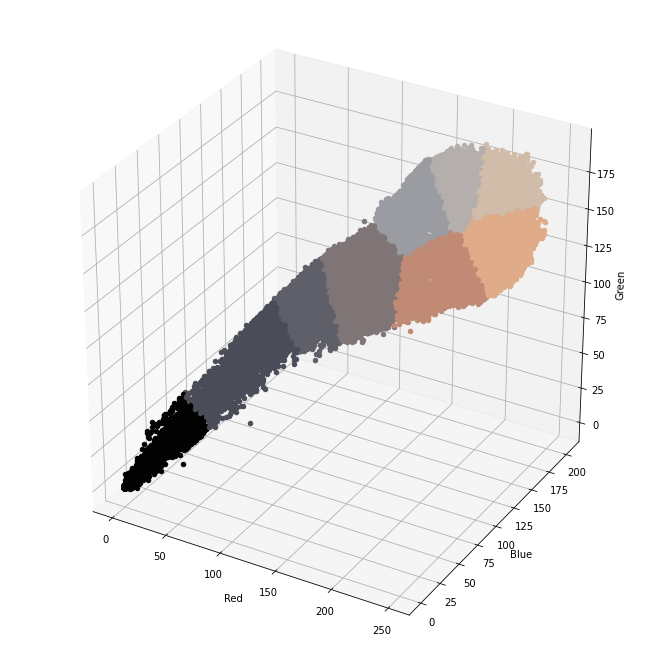

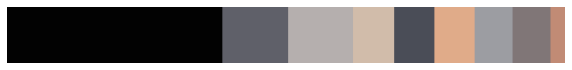

IMG_20200430_071132.jpg
Original image: 12,192,768 pixels
Scaled image: 187,500 pixels (scale factor 12.40%)


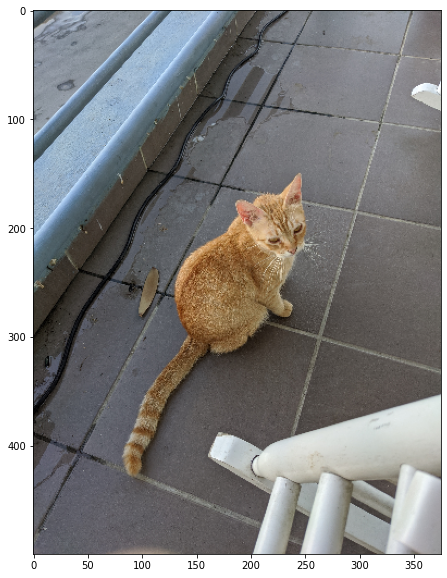

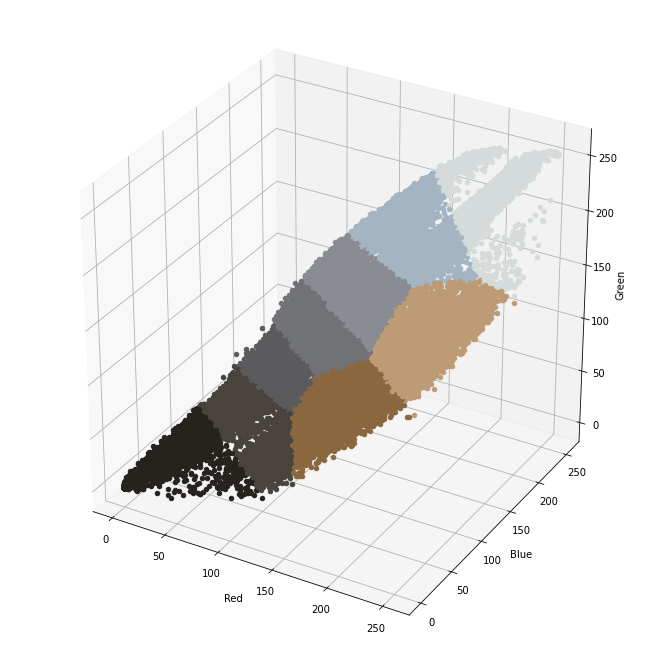

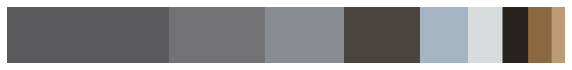

IMG_20200501_181827.jpg
Original image: 12,192,768 pixels
Scaled image: 187,500 pixels (scale factor 12.40%)


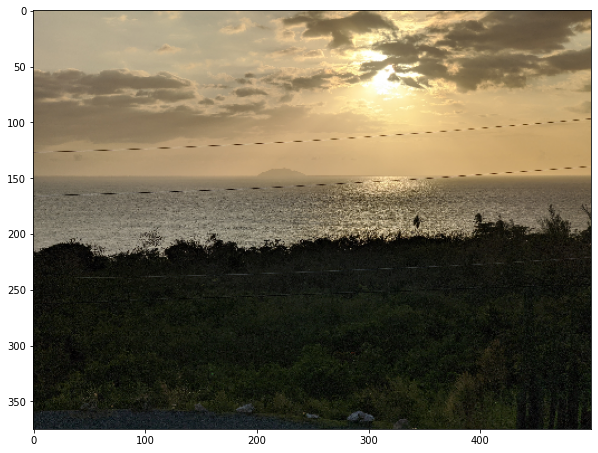

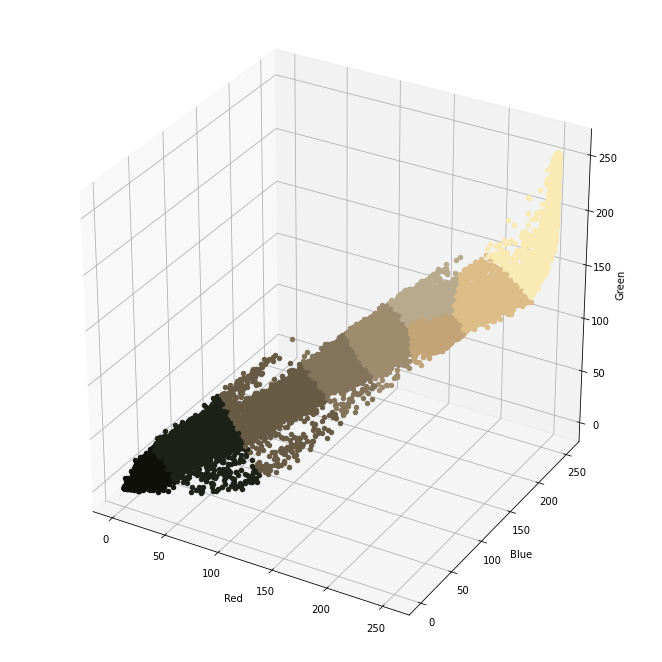

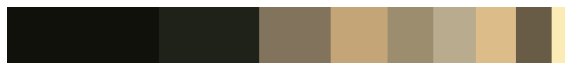

IMG_20200501_103259.jpg
Original image: 12,192,768 pixels
Scaled image: 187,500 pixels (scale factor 12.40%)


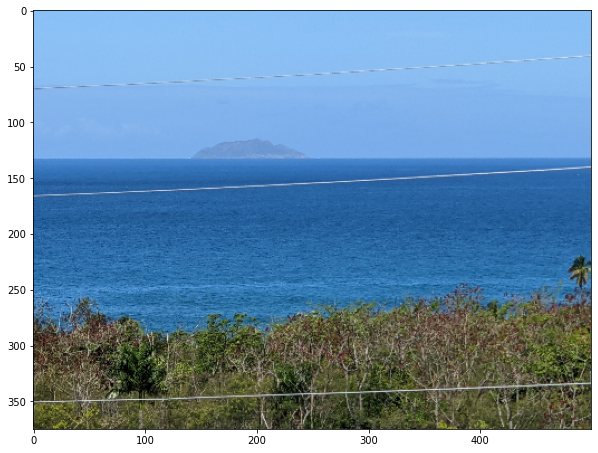

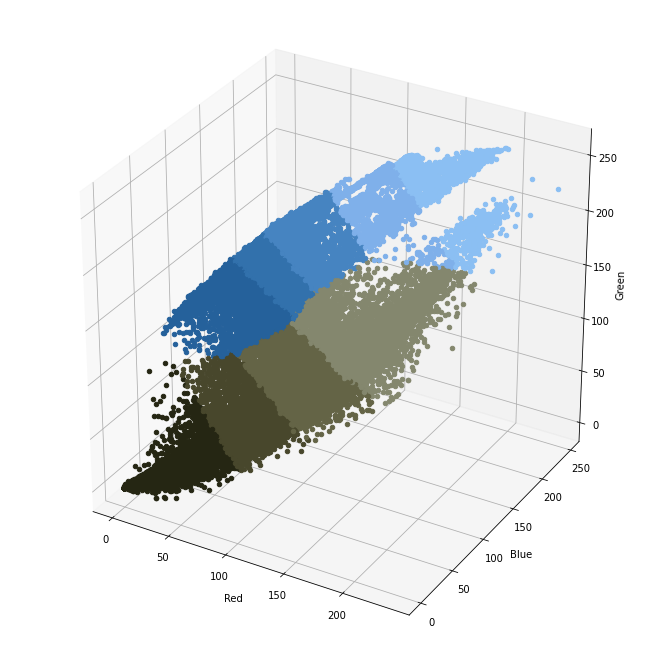

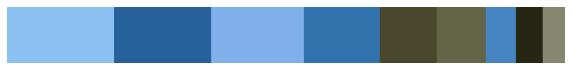

org_172b1327c3de0566_1588277546000.jpg
Original image: 19,961,856 pixels
Scaled image: 166,500 pixels (scale factor 9.14%)


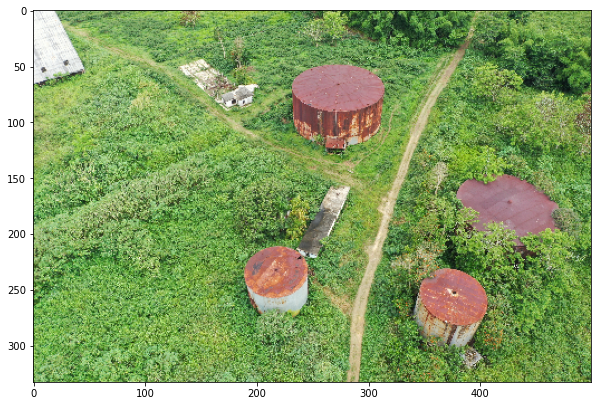

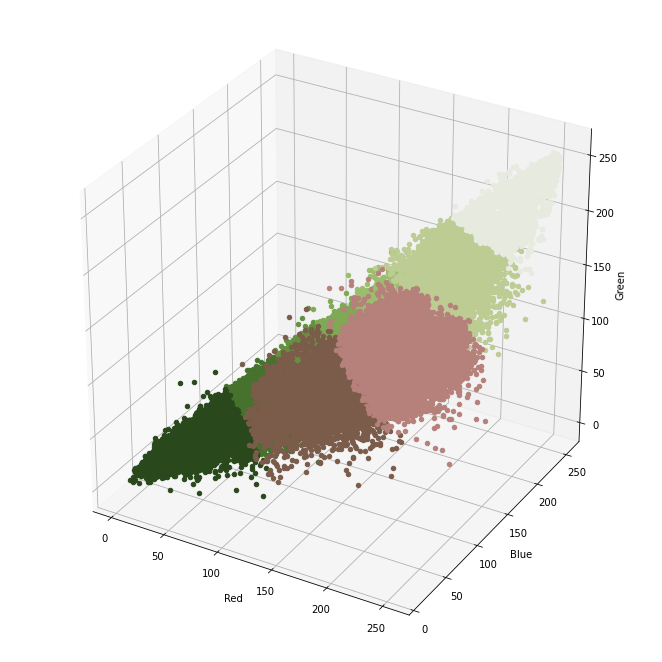

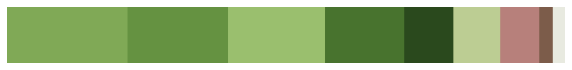

In [48]:
import glob

jpg_files = glob.glob("*.jpg")
clusters = 9
size = 500

for file in jpg_files:
    print(file)
    dc = DominantColors(file, clusters, size)
    colors = dc.clusterColors()
    #print(colors)
    dc.plotClusters()
    dc.plotHistogram()